# Data Preperation 

*Fabian Niebelschütz*

In [3]:
########################################################
#--------------- benötigten Librarys ------------------#
########################################################

import yfinance as yf
import pandas as pd

In [4]:
########################################################
#------------- Historischer Aktienkurs ----------------#
#------------ Import via Yahoo Finance ----------------#
########################################################

ticker = "MBG.DE"
data = yf.download(ticker, period="max")
data.to_csv('/Users/fabi/Documents/BBA/6_Semester/Vertiefung_BBA/Zeitreihenanalyse_Menden/THWS_Reihenanalysen/data/data_Zeitreihe_Fabian_mercedes_benz_historical_data.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
########################################################
#------------- Historischer Aktienkurs ----------------#
#--------------- CSV Datei einlesen -------------------#
########################################################

data = pd.read_csv('/Users/fabi/Documents/BBA/6_Semester/Vertiefung_BBA/Zeitreihenanalyse_Menden/THWS_Reihenanalysen/data/data_Zeitreihe_Fabian_mercedes_benz_historical_data.csv', 
                   skiprows=3, 
                   header=None, 
                   names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], 
                   parse_dates=[0], 
                   index_col=0)  

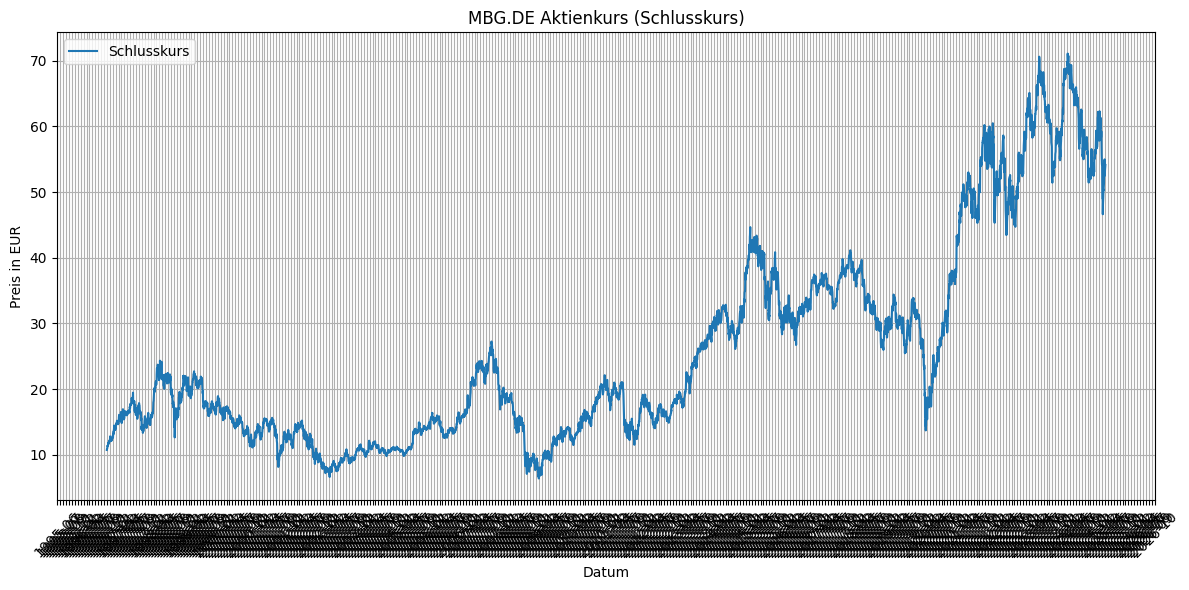

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Schlusskurs')
plt.title(f'{ticker} Aktienkurs (Schlusskurs)')
plt.xlabel('Datum')
plt.ylabel('Preis in EUR')
plt.grid(True)
plt.legend()

# X-Achse formatieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

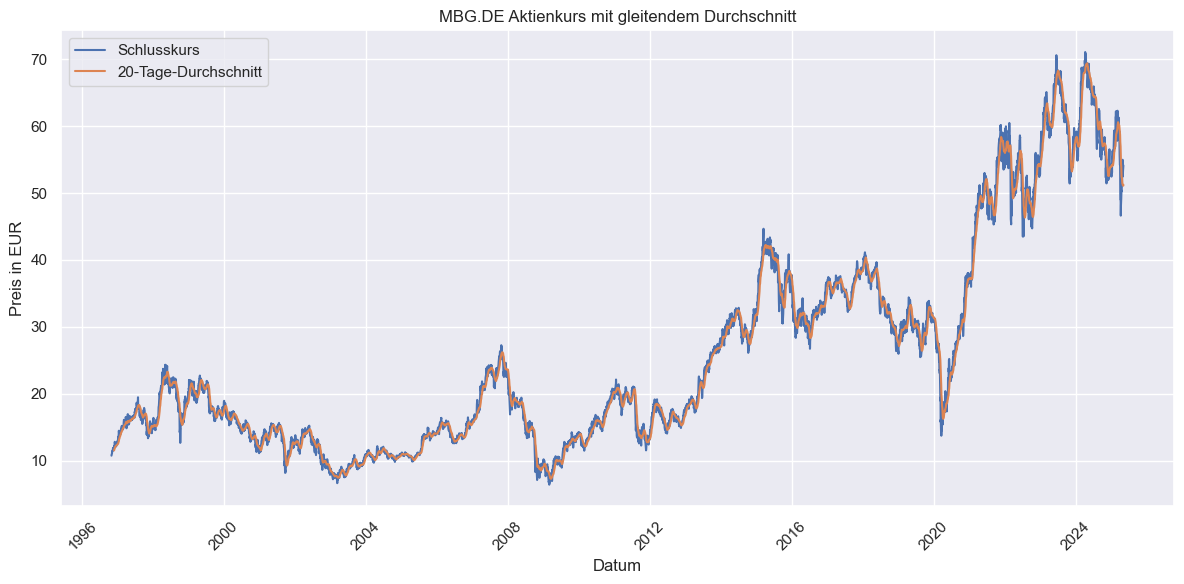

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn-Stil setzen
sns.set_theme(style="darkgrid")

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['Close'], label='Schlusskurs')
sns.lineplot(x=data.index, y=data['Close'].rolling(window=20).mean(), 
             label='20-Tage-Durchschnitt')

plt.title(f'{ticker} Aktienkurs mit gleitendem Durchschnitt')
plt.xlabel('Datum')
plt.ylabel('Preis in EUR')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Candlestick-Chart mit Volumen erstellen
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.02, row_heights=[0.7, 0.3])

# Candlestick
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name='Kurs'
), row=1, col=1)

# Volumen hinzufügen
fig.add_trace(go.Bar(
    x=data.index,
    y=data['Volume'],
    name='Volumen',
    marker_color='rgba(0, 0, 255, 0.5)'
), row=2, col=1)

# Layout anpassen
fig.update_layout(
    title=f'{ticker} Aktienkurs und Handelsvolumen',
    xaxis_title='Datum',
    yaxis_title='Preis in EUR',
    xaxis_rangeslider_visible=False,
    height=800,
    width=1200
)

fig.update_yaxes(title_text="Volumen", row=2, col=1)
fig.update_yaxes(title_text="Preis (EUR)", row=1, col=1)

fig.show()

In [9]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CrosshairTool
from bokeh.layouts import column
import pandas as pd

# Für Jupyter Notebooks
output_notebook()

# Datenquelle erstellen
source = ColumnDataSource(data=dict(
    date=data.index,
    close=data['Close'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    volume=data['Volume']
))

# Kurs-Chart
p1 = figure(width=1200, height=400, title=f"{ticker} Aktienkurs",
           x_axis_type="datetime", tools="pan,wheel_zoom,box_zoom,reset,save")

# Linienplot für Schlusskurs
p1.line('date', 'close', source=source, line_width=2, color='navy', legend_label='Schlusskurs')

# Hover-Tool hinzufügen
hover = HoverTool(
    tooltips=[
        ('Datum', '@date{%F}'),
        ('Schlusskurs', '@close{0.00} €'),
        ('Volumen', '@volume{0,0}')
    ],
    formatters={'@date': 'datetime'}
)
p1.add_tools(hover, CrosshairTool())

# Volumen-Chart
p2 = figure(width=1200, height=200, title=f"{ticker} Handelsvolumen",
           x_axis_type="datetime", x_range=p1.x_range, tools="pan,wheel_zoom,box_zoom,reset,save")
p2.vbar('date', 0.9, 'volume', source=source, color='blue', alpha=0.5)

# Layout
charts = column(p1, p2)
show(charts)

Loading BokehJS ...

In [10]:
data.info

<bound method DataFrame.info of                 Close       High        Low       Open   Volume
Date                                                           
1996-10-30  10.742868  10.836551  10.734353  10.828034  1640521
1996-10-31  10.886429  10.887642  10.767188  10.767188  1908031
1996-11-01  10.937515  11.047023  10.894948  10.949701  2423211
1996-11-04  11.022680  11.045809  10.949700  10.949700  1284644
1996-11-05  11.229508  11.229508  11.016612  11.070128  2105206
...               ...        ...        ...        ...      ...
2025-04-29  53.939999  54.529999  53.279999  54.430000  4119468
2025-04-30  52.470001  54.369999  52.119999  52.910000  4467210
2025-05-02  53.299999  53.770000  52.389999  53.549999  3648200
2025-05-05  53.930000  54.200001  53.090000  53.500000  2565587
2025-05-06  54.119999  54.480000  53.029999  54.360001  3213196

[7305 rows x 5 columns]>